In [3]:
import pandas as pd

In [4]:
clients_df = pd.read_json('./Files/clients.json')
suppliers_df = pd.read_json('./Files/suppliers.json')
sonar_runs_df = pd.read_json('./Files/sonar_runs.json')
sonar_results_df = pd.read_json('./Files/sonar_results.json')


In [5]:
clients_df.head(5)

,_id,name,contract_start
0,{'$oid': '60cde63c3a78c08496cc94fa'},smiablsz,{'$date': '2021-06-01T00:00:00Z'}
1,{'$oid': '5f75dc8ca79f36898b4fae50'},zqzvqcrx,{'$date': '2020-07-01T00:00:00Z'}
2,{'$oid': '6123c85ac2d7aa79245e4c62'},lfgephqb,{'$date': '2021-08-01T00:00:00Z'}
3,{'$oid': '610967c5b4e576569627b60b'},okkpmsit,{'$date': '2021-08-01T00:00:00Z'}
4,{'$oid': '61603177a5156d40200ad74b'},ayndkulu,{'$date': '2021-09-01T00:00:00Z'}


In [6]:
suppliers_df.head(5)



,name,country,_id
0,Halstrup-Walcher DeepDive,DEU,{'$oid': '6086c347701bfd9e246ae133'}
1,Meissner DeepDive,DEU,{'$oid': '6086c321701bfd9e246adf39'}
2,Ventile24,DEU,{'$oid': '5f65f34555b0e75f4f6d925c'}
3,Mouser Europe,DEU,{'$oid': '609a2f0a0663787efac09b9a'}
4,Könitzer DeepDive,DEU,{'$oid': '6086c31e701bfd9e246adf09'}


In [7]:
sonar_runs_df.head(5)


,_id,date,status,client_id,supplier_ids
0,{'$oid': '6464bb1203b0ba705c3e2b33'},{'$date': '2023-05-01T00:00:00Z'},complete,{'$oid': '62d7f57ef857ce646635a487'},"[{'$oid': '609a2dd9e31b2f611bc09b88'}, {'$oid'..."
1,{'$oid': '63495ebc4471dd08f04f5eb0'},{'$date': '2022-10-01T00:00:00Z'},complete,{'$oid': '624c12121a3a95bca67b6c7e'},"[{'$oid': '609a2dd9e31b2f611bc09b88'}, {'$oid'..."
2,{'$oid': '61bc1f176e3ce64a1053134d'},{'$date': '2021-12-01T00:00:00Z'},complete,{'$oid': '61b9b70ddee5cd96652a2806'},"[{'$oid': '612f9c3b5244bfd8389c840b'}, {'$oid'..."
3,{'$oid': '6461f45ff8d3badcf0812e33'},{'$date': '2023-05-01T00:00:00Z'},complete,{'$oid': '63983c05a371c395a226d706'},"[{'$oid': '60b1dcfb2313fbb5b0b02ace'}, {'$oid'..."
4,{'$oid': '63a31bebf35a544546e0f129'},{'$date': '2022-12-01T00:00:00Z'},complete,{'$oid': '63652f093639a13d2040c4a5'},"[{'$oid': '609a2dd9e31b2f611bc09b88'}, {'$oid'..."


In [8]:
sonar_results_df.head(5)

,_id,price_norm,part_id,supplier_id,sonar_run_id
0,{'$oid': '61669608cd5d4d202bd6456a'},1769.50,{'$oid': '61666b611f5ebf437458bc52'},{'$oid': '5f65f34455b0e75f4f6d9241'},{'$oid': '6166875ff21316461be8a07d'}
1,{'$oid': '61669610cd5d4d202bd64583'},780.56,{'$oid': '61666b611f5ebf437458bc66'},{'$oid': '5f65f34455b0e75f4f6d9241'},{'$oid': '6166875ff21316461be8a07d'}
2,{'$oid': '61669613cd5d4d202bd64589'},273.14,{'$oid': '61666b611f5ebf437458bc2e'},{'$oid': '609bb1d2d8ef62bf74cf2f51'},{'$oid': '6166875ff21316461be8a07d'}
3,{'$oid': '61669630cd5d4d202bd645cd'},273.45,{'$oid': '61666b611f5ebf437458bc2e'},{'$oid': '5f65f34455b0e75f4f6d9241'},{'$oid': '6166875ff21316461be8a07d'}
4,{'$oid': '61669683cd5d4d202bd646a3'},1596.63,{'$oid': '61666b611f5ebf437458bc10'},{'$oid': '5f65f34455b0e75f4f6d9241'},{'$oid': '6166875ff21316461be8a07d'}


In [9]:
#Data Cleaning

#checking for all the null values
print(clients_df.isnull().sum())
print(suppliers_df.isnull().sum())
print(sonar_runs_df.isnull().sum())
print(sonar_results_df.isnull().sum())

_id               0
name              0
contract_start    0
dtype: int64
name       0
country    0
_id        0
dtype: int64
_id             0
date            0
status          0
client_id       0
supplier_ids    0
dtype: int64
_id             0
price_norm      0
part_id         0
supplier_id     0
sonar_run_id    0
dtype: int64


Visualizing relation between collections

In [10]:
#pip install networkx

In [11]:
# Converting ObjectId to a compatible format if necessary
clients_df['_id'] = clients_df['_id'].apply(lambda x: x.get('$oid') if isinstance(x, dict) else x)
suppliers_df['_id'] = suppliers_df['_id'].apply(lambda x: x.get('$oid') if isinstance(x, dict) else x)
sonar_runs_df['client_id'] = sonar_runs_df['client_id'].apply(lambda x: x.get('$oid') if isinstance(x, dict) else x)
sonar_results_df['sonar_run_id'] = sonar_results_df['sonar_run_id'].apply(lambda x: x.get('$oid') if isinstance(x, dict) else x)

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

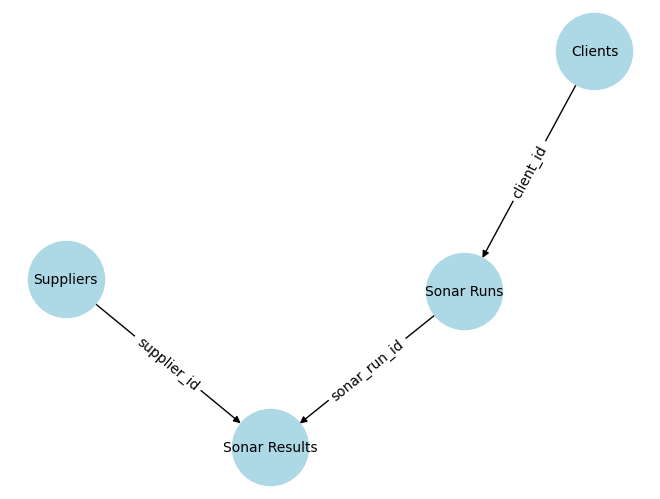

In [13]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (collections)
G.add_node('Clients')
G.add_node('Suppliers')
G.add_node('Sonar Runs')
G.add_node('Sonar Results')

# Add edges (relationships between collections)
G.add_edge('Clients', 'Sonar Runs', label='client_id')
G.add_edge('Sonar Runs', 'Sonar Results', label='sonar_run_id')
G.add_edge('Suppliers', 'Sonar Results', label='supplier_id')

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={('Clients', 'Sonar Runs'): 'client_id', 
                                                  ('Sonar Runs', 'Sonar Results'): 'sonar_run_id',
                                                  ('Suppliers', 'Sonar Results'): 'supplier_id'})
plt.show()


So from the above result we can see that there is no direct relationship between **clients** and **suppliers** instead they are only connected indirectly through **sonar runs** and **sonar results**.

Data Transformation

In [37]:
from sqlalchemy import create_engine
import pandas as pd

# Function to process OID fields
def process_oid_fields(df, oid_columns):
    for col in oid_columns:
        df[col] = df[col].apply(lambda x: x.get('$oid') if isinstance(x, dict) else x)
    return df

# Function to process date fields
def process_date_fields(df, date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

# Function to load data into PostgreSQL
def load_data_to_postgres(engine, df, table_name):
    try:
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"Data successfully loaded into {table_name} table.")
    except Exception as e:
        print(f"Error loading data into {table_name}: {e}")

# Function to create PostgreSQL connection
def create_postgres_connection(dbname, user, password, host, port):
    url = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
    engine = create_engine(url)
    return engine

# ETL Process with data transformation and validation
def etl_process(json_data_clients, json_data_suppliers, json_data_sonar_runs, json_data_sonar_results):
    # Convert JSON to DataFrames
    clients_df = pd.DataFrame(json_data_clients)
    suppliers_df = pd.DataFrame(json_data_suppliers)
    sonar_runs_df = pd.DataFrame(json_data_sonar_runs)
    sonar_results_df = pd.DataFrame(json_data_sonar_results)

    # Debugging checks for Clients
    print("Clients DataFrame Schema:")
    print(clients_df.dtypes)
    print(clients_df.head())

    # Processing OID and Date Fields for Clients
    clients_df = process_oid_fields(clients_df, ['_id'])
    clients_df = process_date_fields(clients_df, ['contract_start'])

    print("Processed Clients DataFrame:")
    print(clients_df.head())

    # Debugging checks for Suppliers
    print("Suppliers DataFrame Schema:")
    print(suppliers_df.dtypes)
    print(suppliers_df.head())

    # Processing OID fields for Suppliers
    suppliers_df = process_oid_fields(suppliers_df, ['_id'])

    # Debugging checks for Sonar Runs
    print("Sonar Runs DataFrame Schema:")
    print(sonar_runs_df.dtypes)
    print(sonar_runs_df.head())

    # Processing OID fields and Date for Sonar Runs
    sonar_runs_df = process_oid_fields(sonar_runs_df, ['_id', 'client_id'])
    sonar_runs_df = process_date_fields(sonar_runs_df, ['date'])

    # Debugging checks for Sonar Results
    print("Sonar Results DataFrame Schema:")
    print(sonar_results_df.dtypes)
    print(sonar_results_df.head())

    # Processing OID fields for Sonar Results
    sonar_results_df = process_oid_fields(sonar_results_df, ['_id', 'sonar_run_id', 'supplier_id'])

    # Create PostgreSQL connection
    engine = create_postgres_connection(dbname='pilot_db', user='postgres', password='1998', host='localhost', port=5432)

    # Load data into PostgreSQL with error handling
    load_data_to_postgres(engine, clients_df, 'clients')
    load_data_to_postgres(engine, suppliers_df, 'suppliers')
    load_data_to_postgres(engine, sonar_runs_df, 'sonar_runs')
    load_data_to_postgres(engine, sonar_results_df, 'sonar_results')

